In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import plotly
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv


In [ ]:
df = pd.read_csv("covid_19_clean_complete.csv", parse_dates = ['Date'])
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
# Renaming columns for easy usage
df.rename(columns = {'Date': 'date',
                      'Province/State': 'state',
                      'Country/Region': 'country',
                      'Lat' : 'lat', 'Long': 'long',
                      'Confirmed' : 'confirmed',
                      'Deaths' : 'deaths',
                      'Recovered' : 'recovered'},
            inplace = True)

In [ ]:
# Active Cases
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']

In [ ]:
top = df[df['date'] == df['date'].max()]
top

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean,9796
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe,1991
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa,7973
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe,52
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa,667
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,117
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,375
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,19
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,1147


In [ ]:
# combining the latest data for the countries
top = df[df['date'] == df['date'].max()]
world = top.groupby('country')['confirmed', 'active', 'deaths'].sum().reset_index()
world.head()

,country,confirmed,active,deaths
0,Afghanistan,36263,9796,1269
1,Albania,4880,1991,144
2,Algeria,27973,7973,1163
3,Andorra,907,52,52
4,Angola,950,667,41


In [ ]:
figure = px.choropleth(world, locations = 'country',
                        locationmode = 'country names', color = 'active',
                        hover_name = 'country', range_color = [1,1000],
                        color_continuous_scale = "blues",
                        title = "Countries with Active Cases")

figure.show()

In [ ]:
# Determine the Total Confimed Cases grouped by Date
total_cases = df.groupby('date')['date', 'confirmed'].sum().reset_index()
total_cases.head()

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total Cases')]

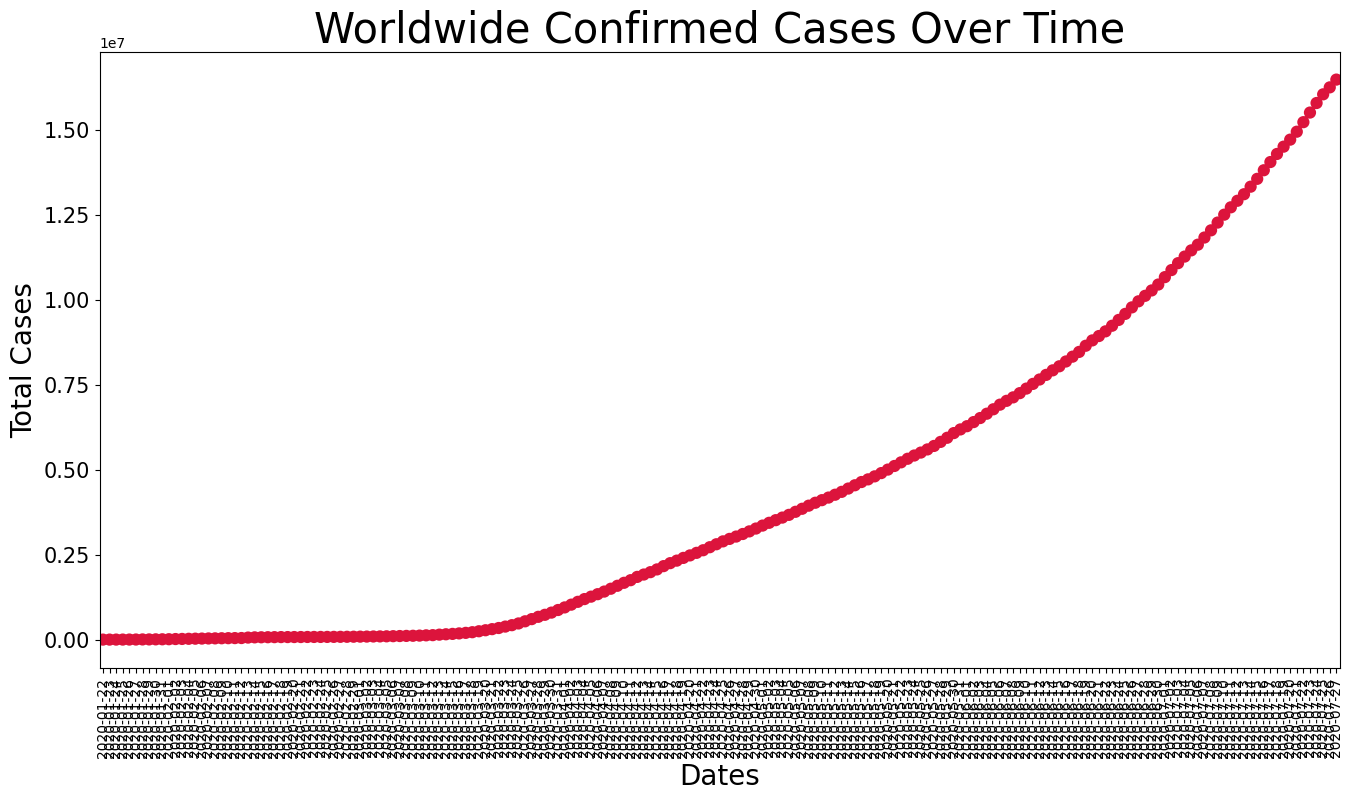

In [ ]:
plt.figure(figsize = (16,8))
plt.xticks(rotation = 90, fontsize= 10)
plt.yticks (fontsize = 15)
plt.xlabel("Dates", fontsize = 20)
plt.ylabel("Total Cases", fontsize = 20)
plt.title("Worldwide Confirmed Cases Over Time", fontsize = 30)

ax = sns.pointplot(x = total_cases.date.dt.date, y = total_cases.confirmed, color = 'crimson')
ax.set(xlabel = 'Dates', ylabel = 'Total Cases')

In [ ]:
# Current Top Countries having most Active Cases
top_actives = top.groupby(by = 'country')['active'].sum().sort_values(ascending=False).head(20).reset_index()
top_actives

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

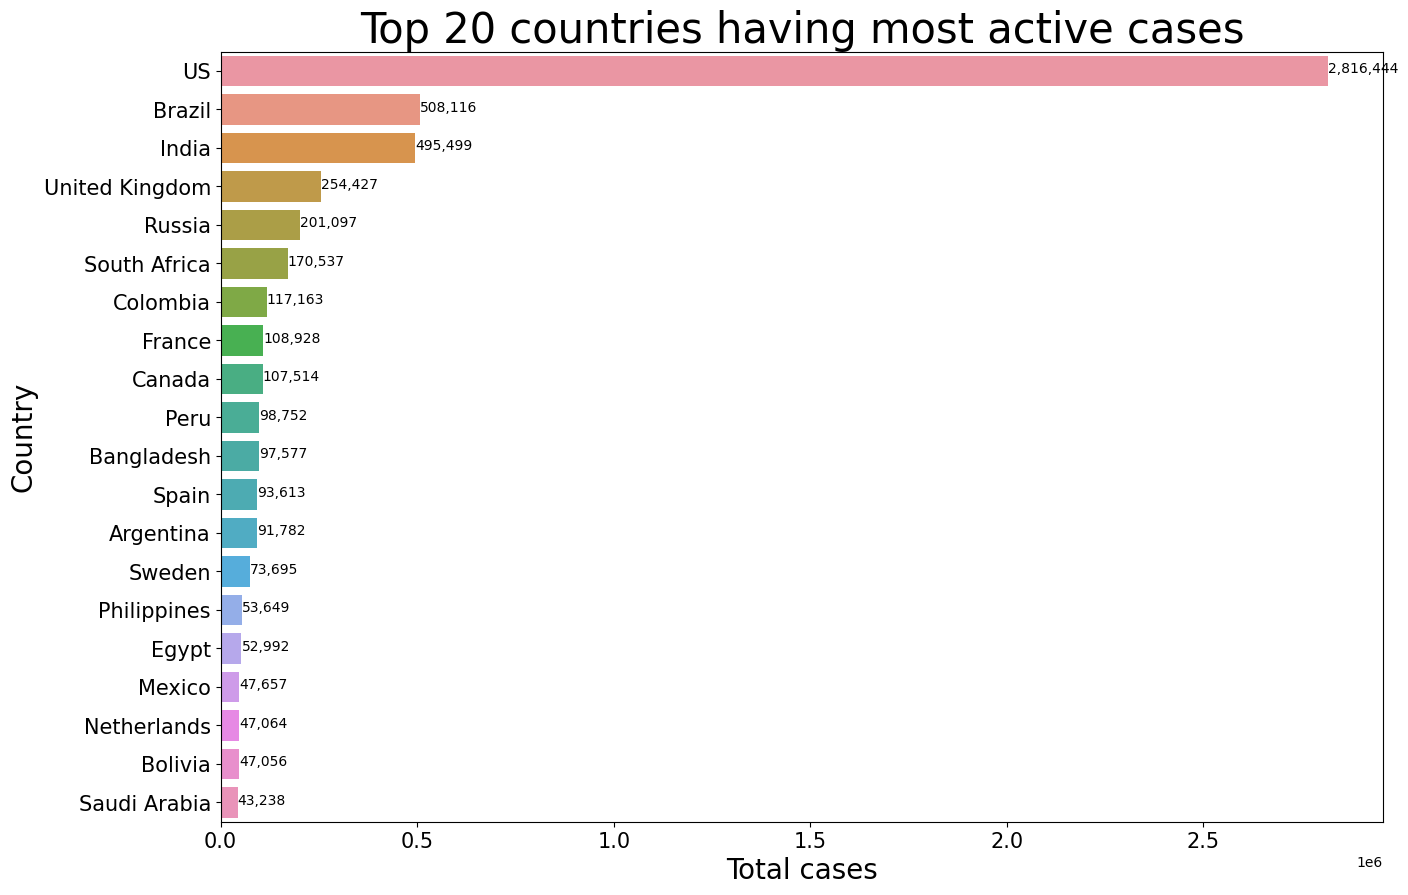

In [ ]:
plt.figure(figsize = (15,10))
plt.xticks(fontsize= 15)
plt.yticks (fontsize = 15)
plt.xlabel("Total Cases", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.title("Top 20 countries having most active cases", fontsize = 30)

ax = sns.barplot(x = top_actives.active, y = top_actives.country)

for i, (value, name) in enumerate(zip(top_actives.active, top_actives.country)):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha ='left', va = 'center')

ax.set(xlabel = 'Total cases', ylabel = 'Country')

In [ ]:
# Data of China
china = df[df.country == 'China']
china = china.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
china.head()

,date,recovered,deaths,confirmed,active
0,2020-01-22,28,17,548,503
1,2020-01-23,30,18,643,595
2,2020-01-24,36,26,920,858
3,2020-01-25,39,42,1406,1325
4,2020-01-26,49,56,2075,1970


In [ ]:
# Data of USA
us = df[df.country == 'US']
us = us.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
us = us.iloc[33:].reset_index().drop('index', axis = 1)
us.head()

,date,recovered,deaths,confirmed,active
0,2020-02-24,5,0,15,10
1,2020-02-25,6,0,15,9
2,2020-02-26,6,0,15,9
3,2020-02-27,6,0,16,10
4,2020-02-28,7,0,16,9


In [ ]:
# Data of Italy
italy = df[df.country == 'Italy']
italy = italy.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
italy = italy.iloc[9:].reset_index().drop('index', axis = 1)
italy.head()

,date,recovered,deaths,confirmed,active
0,2020-01-31,0,0,2,2
1,2020-02-01,0,0,2,2
2,2020-02-02,0,0,2,2
3,2020-02-03,0,0,2,2
4,2020-02-04,0,0,2,2


In [ ]:
india = df[df.country == 'India']
india = india.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
india = india.iloc[8:].reset_index().drop('index', axis = 1)
india.head()

,date,recovered,deaths,confirmed,active
0,2020-01-30,0,0,1,1
1,2020-01-31,0,0,1,1
2,2020-02-01,0,0,1,1
3,2020-02-02,0,0,2,2
4,2020-02-03,0,0,3,3


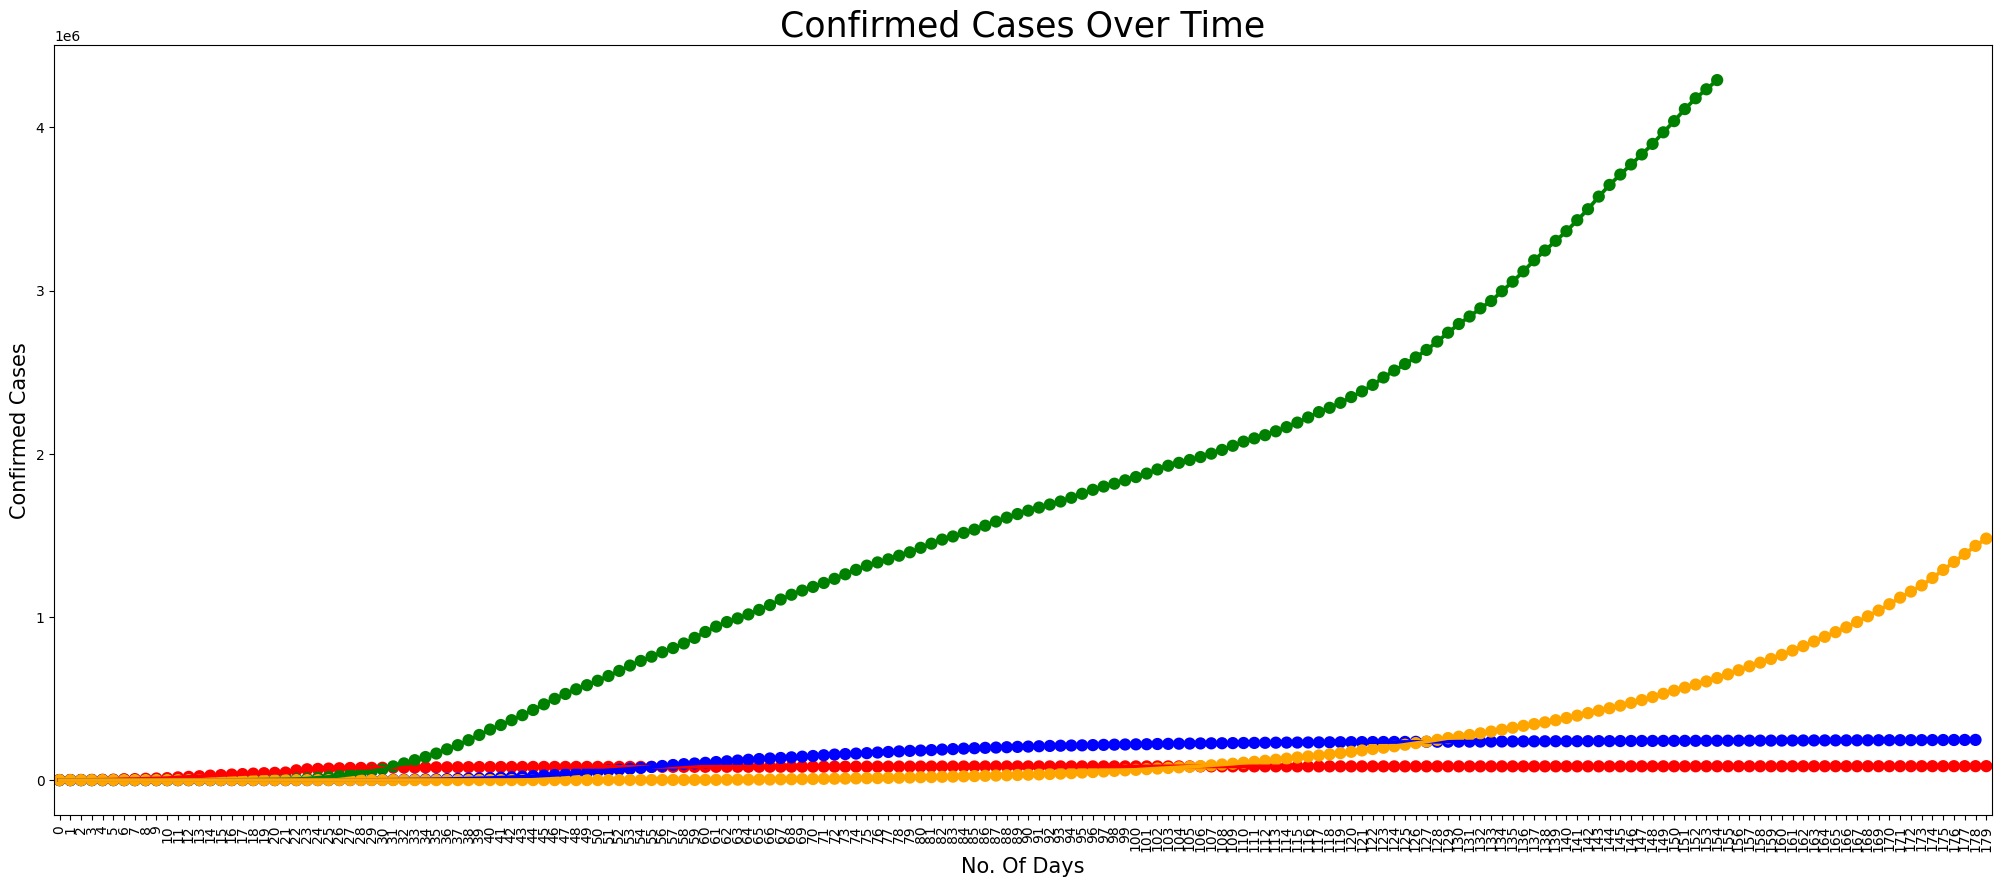

In [ ]:
plt.figure(figsize=(25,10))
sns.pointplot(x=china.index,y=china.confirmed, color='red')
sns.pointplot(x=us.index,y= us.confirmed, color='green')
sns.pointplot(x=italy.index,y= italy.confirmed, color='blue')
sns.pointplot(x=india.index,y= india.confirmed, color='orange')
plt.title('Confirmed Cases Over Time', fontsize = 25)
plt.xlabel('No. Of Days', fontsize = 15)
plt.xticks(rotation = 90, fontsize= 10)
plt.ylabel('Confirmed Cases', fontsize = 15)
plt.show()

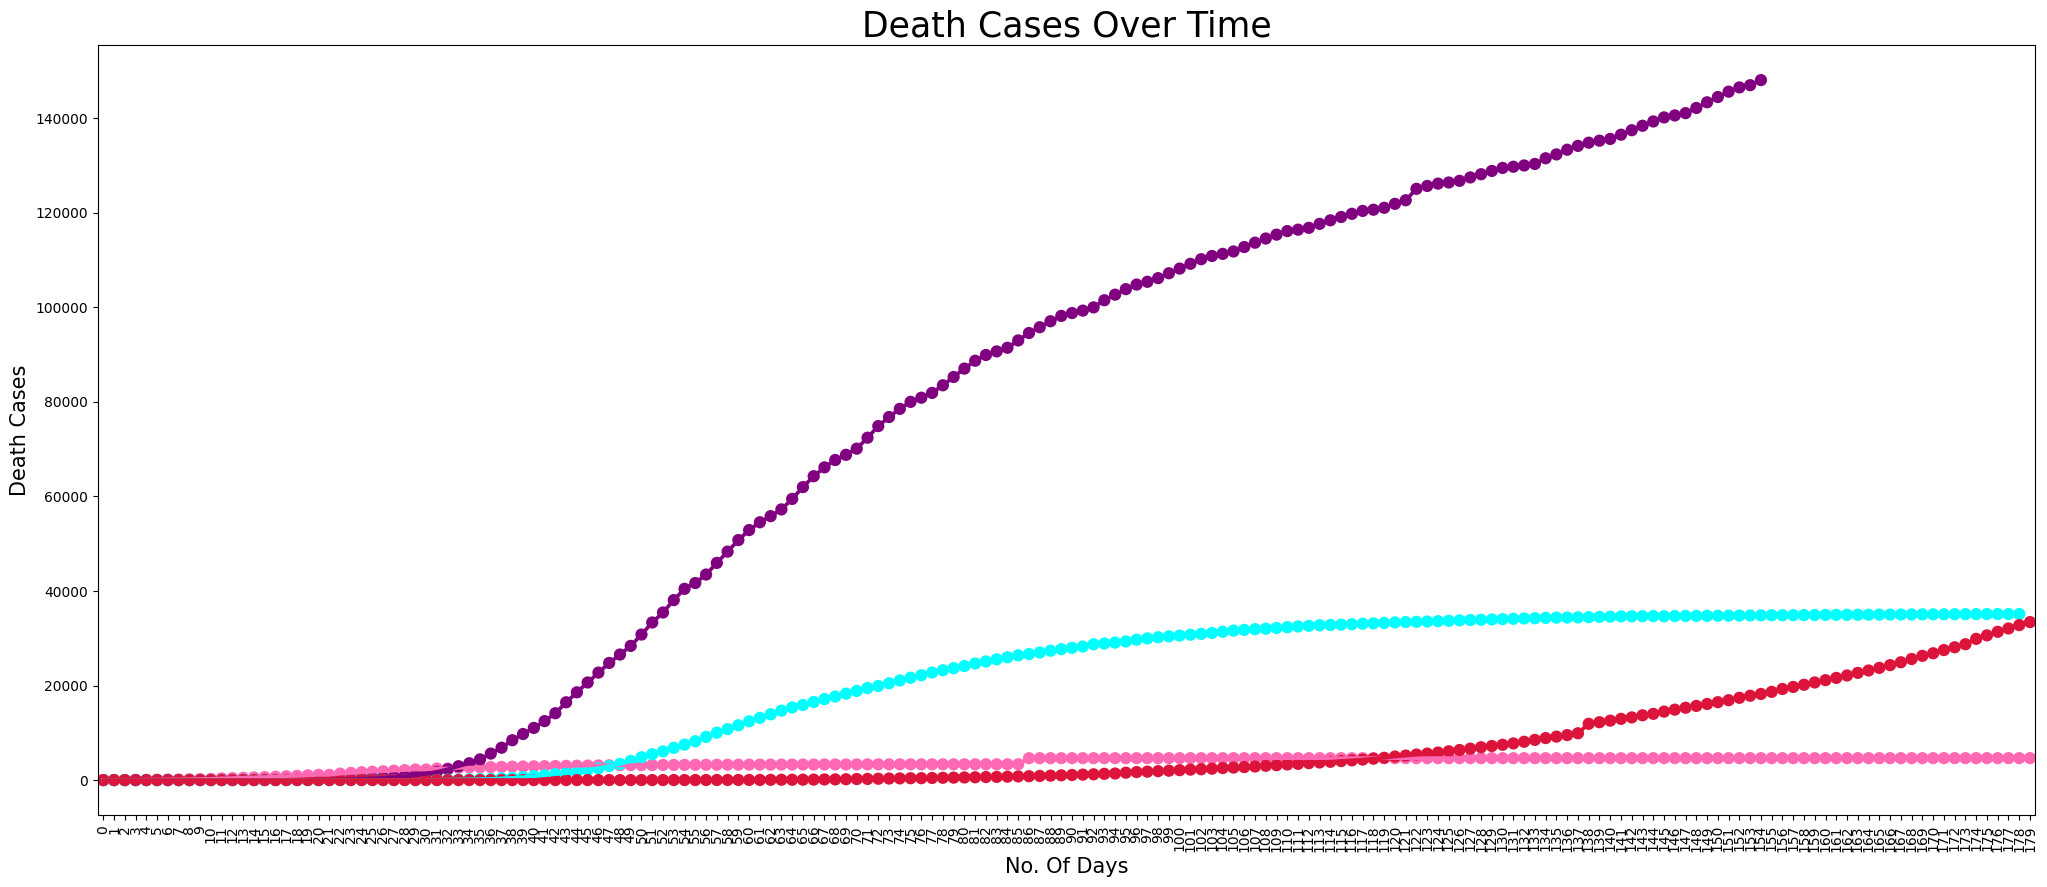

In [ ]:
plt.figure(figsize=(25,10))

sns.pointplot(x=china.index, y=china.deaths, color='hotpink')
sns.pointplot(x=us.index,y= us.deaths, color='purple')
sns.pointplot(x=italy.index,y= italy.deaths, color='aqua')
sns.pointplot(x=india.index,y= india.deaths, color='crimson')
plt.title('Death Cases Over Time', fontsize = 25)
plt.xlabel('No. Of Days', fontsize = 15)
plt.xticks(rotation = 90, fontsize= 10)
plt.ylabel('Death Cases', fontsize = 15)
plt.show()

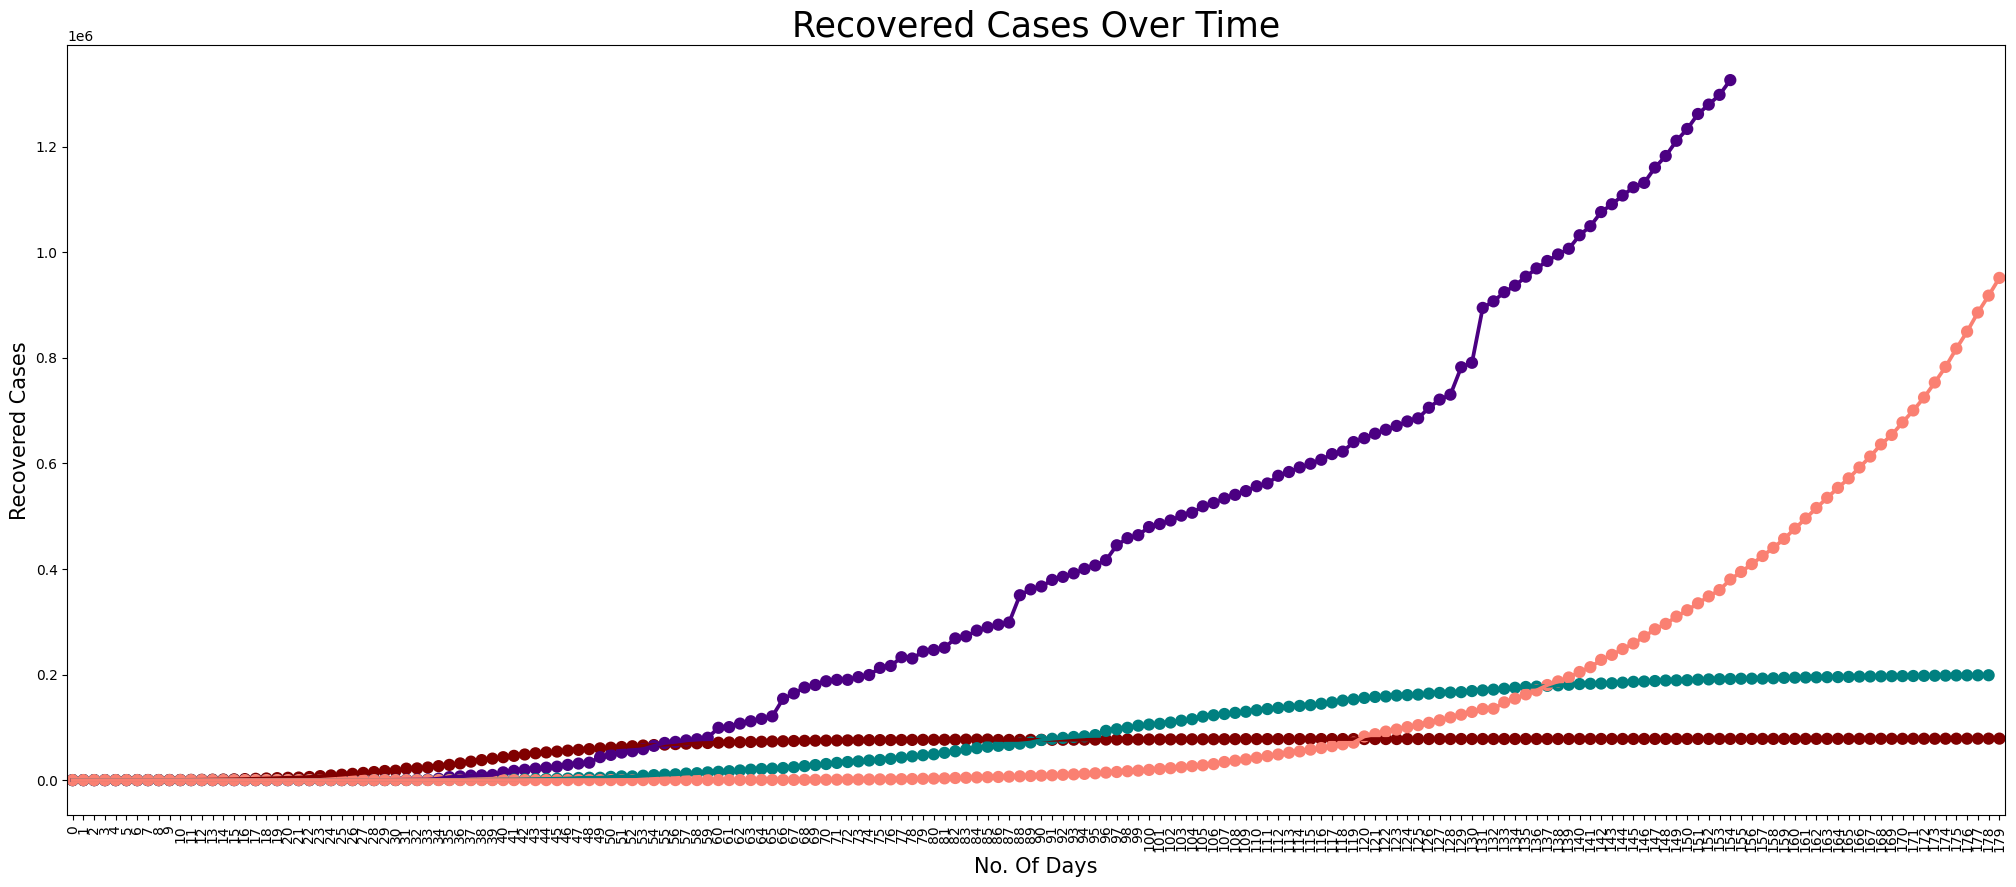

In [ ]:
plt.figure(figsize=(25,10))

sns.pointplot(x=china.index,y= china.recovered, color='maroon')
sns.pointplot(x=us.index,y= us.recovered, color='indigo')
sns.pointplot(x=italy.index,y= italy.recovered, color='teal')
sns.pointplot(x=india.index,y= india.recovered, color='salmon')
plt.title('Recovered Cases Over Time', fontsize = 25)
plt.xlabel('No. Of Days', fontsize = 15)
plt.xticks(rotation = 90, fontsize= 10)
plt.ylabel('Recovered Cases', fontsize = 15)
plt.show()

# Detailed Analysis of COVID Cases in India

In [ ]:
from google.colab import files
uploaded1 = files.upload()

Saving time_series_covid19_deaths_global.csv to time_series_covid19_deaths_global.csv


In [ ]:
df_india = pd.read_excel('covid_19_india.xlsx')
df_india.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1


In [ ]:
df_india['Total Cases'] = df_india['Total Confirmed cases (Indian National)'] + df_india['Total Confirmed cases ( Foreign National )']
df_india.head(2)

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,1,Andhra Pradesh,9,0,0,0,9
1,2,Bihar,3,0,0,1,3


In [ ]:
df_india['Total Active'] = df_india['Total Cases'] - (df_india['Death'] + df_india['Cured'])
total_active = df_india['Total Active'].sum()
print('Total Number of Active COVID 19 cases across India', total_active)
Tot_Cases = df_india.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending = False).to_frame()
Tot_Cases.style.background_gradient(cmap='coolwarm')

Total Number of Active COVID 19 cases across India 512


,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


[Text(0, 0.5, 'States and UT'), Text(0.5, 0, 'Cases')]

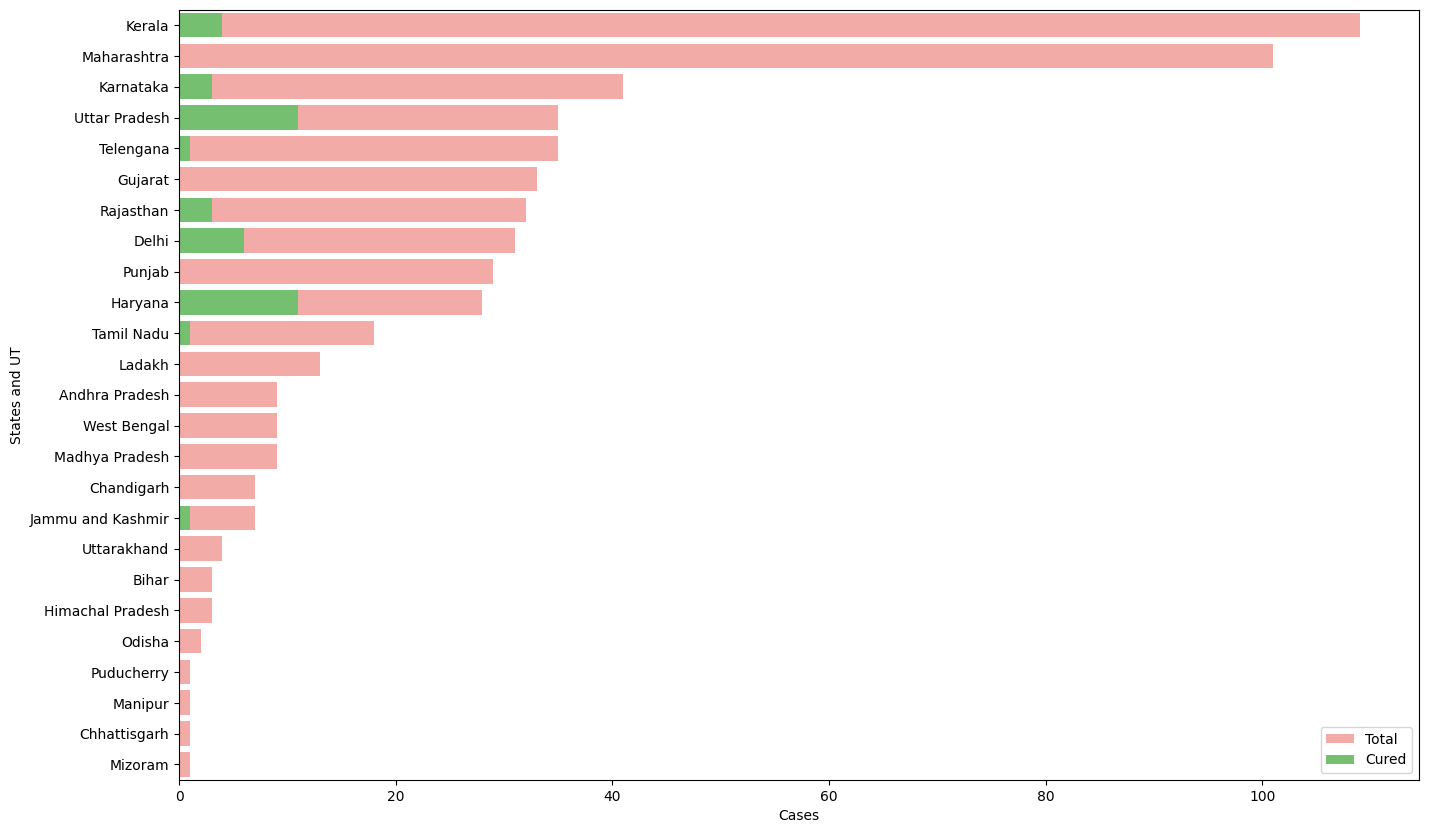

In [ ]:
f,ax= plt.subplots(figsize=(16,10))
data = df_india[['Name of State / UT','Total Cases','Cured','Death']]
data.sort_values('Total Cases', ascending=False, inplace = True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Cases", y="Name of State / UT", data=data, label="Total", color ="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color ="g")

ax.legend(loc="lower right")
ax.set(ylabel="States and UT", xlabel="Cases")


In [ ]:
dbd_india = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_india.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_india['Date'], y=dbd_india['Total Cases'], mode='lines+markers', name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus cases in India (Cumulative Cases)')
fig.show()
fig = px.bar(dbd_india, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus cases in India on daily basis')
fig.show()

# Insights into COVID cases globally

In [ ]:
df_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')
df_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')

df_confirmed.rename(columns = {'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns = {'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns = {'Country/Region':'Country'}, inplace=True)

In [ ]:
df_confirmed.head(2)

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123


In [ ]:
df_recovered.head(2)

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0,101.0,0,0,0,0,2,2,...,35,35,35,41,42,42,42,42,44,44.0
1,NaN,Japan,36.0,138.0,0,0,0,0,1,1,...,118,118,144,144,144,150,191,232,235,235.0


In [ ]:
df_deaths.head(2)

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,4,5


In [ ]:
df.head(2)

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,0


In [ ]:
df2 = df.groupby(['date', 'country', 'state'])[['date', 'state', 'country', 'confirmed', 'deaths', 'recovered']]
df2.head()

,date,state,country,confirmed,deaths,recovered
8,2020-01-22,Australian Capital Territory,Australia,0,0,0
9,2020-01-22,New South Wales,Australia,0,0,0
10,2020-01-22,Northern Territory,Australia,0,0,0
11,2020-01-22,Queensland,Australia,0,0,0
12,2020-01-22,South Australia,Australia,0,0,0
...,...,...,...,...,...,...
49052,2020-07-27,Anguilla,United Kingdom,3,0,3
49053,2020-07-27,British Virgin Islands,United Kingdom,8,1,7
49054,2020-07-27,Turks and Caicos Islands,United Kingdom,99,2,36
49059,2020-07-27,Falkland Islands (Malvinas),United Kingdom,13,0,13


In [ ]:
df_india_cases = df.query('country == "India"').groupby("date")[['confirmed', 'deaths', 'recovered']].sum().reset_index()
india_confirmed, india_deaths, india_recovered = df_india_cases[['date', 'confirmed']], df_india_cases[['date', 'deaths']], df_india_cases[['date', 'recovered']]

In [ ]:
df.groupby('date').sum().head()

,lat,long,confirmed,deaths,recovered,Active,active
date,,,,,,,
2020-01-22,5594.20365,6140.869714,555,17,28,510,510
2020-01-23,5594.20365,6140.869714,654,18,30,606,606
2020-01-24,5594.20365,6140.869714,941,26,36,879,879
2020-01-25,5594.20365,6140.869714,1434,42,39,1353,1353
2020-01-26,5594.20365,6140.869714,2118,56,52,2010,2010


In [ ]:
confirmed = df.groupby('date').sum()['confirmed'].reset_index()
deaths = df.groupby('date').sum()['deaths'].reset_index()
recovered = df.groupby('date').sum()['recovered'].reset_index()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['date'], y=confirmed['confirmed'], mode='lines+markers', name='confirmed', line = dict(color = 'blue')))
fig.add_trace(go.Scatter(x=deaths['date'], y=deaths['deaths'], mode='lines+markers', name='deaths', line = dict(color = 'red')))
fig.add_trace(go.Scatter(x=recovered['date'], y=recovered['recovered'], mode='lines+markers', name='recovered', line = dict(color = 'green')))
fig.update_layout(title_text='World wide COVID-19 Cases', xaxis_tickfont_size = 14, yaxis=dict(title='Number of Cases'), plot_bgcolor='rgb(230, 230, 230)')
fig.show()


# TimeSeries Analysis of COVID cases globally and India in Particular

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
confirmed.columns = ['ds', 'y']
confirmed['ds']= pd.to_datetime(confirmed['ds'])


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future=m.make_future_dataframe(periods=7)
future.tail()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfwidy9l/j458aksn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfwidy9l/0tv_31nq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11438', 'data', 'file=/tmp/tmpdfwidy9l/j458aksn.json', 'init=/tmp/tmpdfwidy9l/0tv_31nq.json', 'output', 'file=/tmp/tmpdfwidy9l/prophet_modelg2uzunhs/prophet_model-20230914141545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:15:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,1.674386e+07,1.657560e+07,1.690219e+07
191,2020-07-31,1.695903e+07,1.679793e+07,1.712987e+07
192,2020-08-01,1.716665e+07,1.700757e+07,1.733359e+07
193,2020-08-02,1.736416e+07,1.719059e+07,1.753435e+07
194,2020-08-03,1.755879e+07,1.737408e+07,1.773540e+07


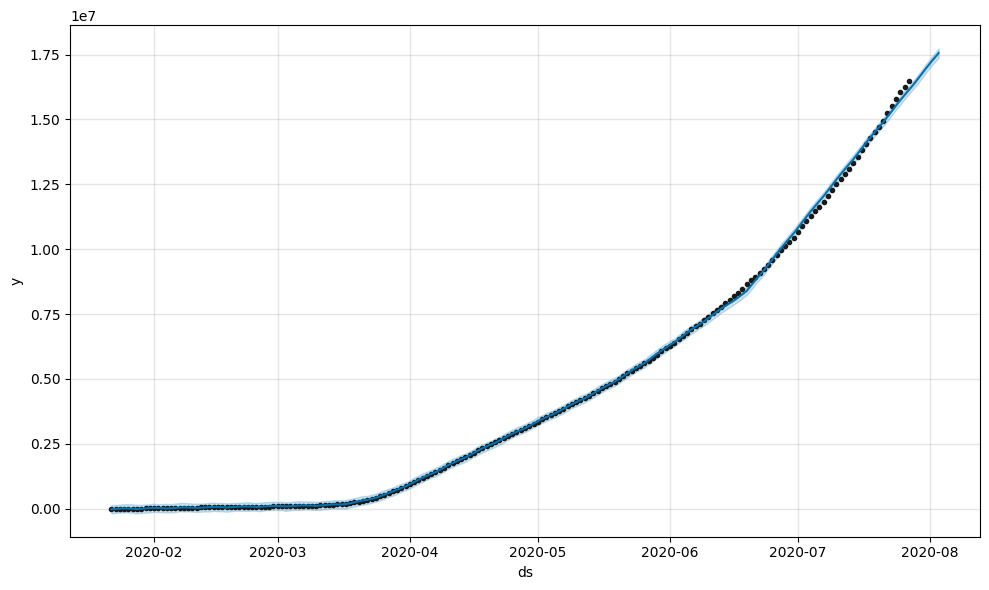

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

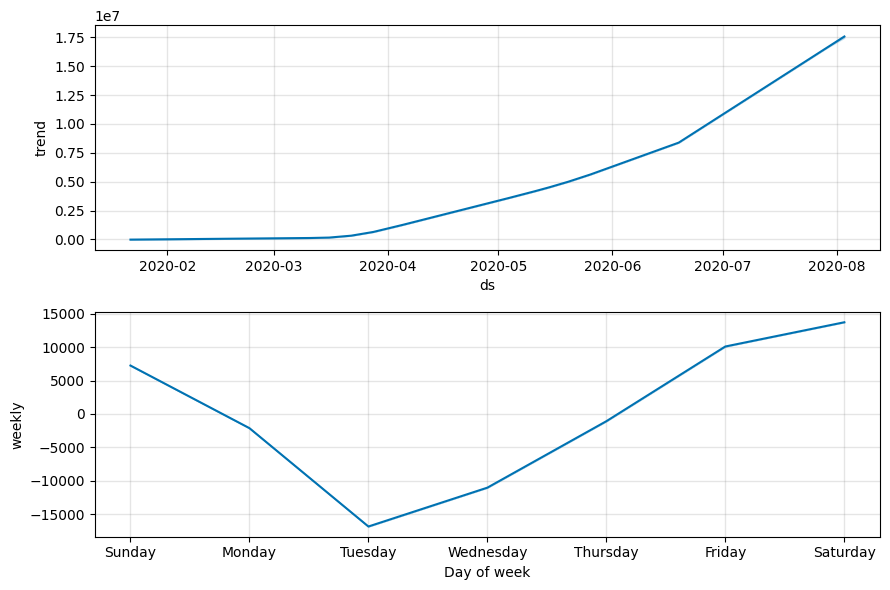

In [ ]:
confirmed_forecast_plot = m.plot_components(forecast)

In [ ]:
deaths.columns = ['ds', 'y']
deaths['ds']= pd.to_datetime(deaths['ds'])

In [ ]:
m = Prophet()
m.fit(deaths)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfwidy9l/a95op_kv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfwidy9l/2o71ymzk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99269', 'data', 'file=/tmp/tmpdfwidy9l/a95op_kv.json', 'init=/tmp/tmpdfwidy9l/2o71ymzk.json', 'output', 'file=/tmp/tmpdfwidy9l/prophet_model79988fo_/prophet_model-20230914141629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:16:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,663508.283269,661393.275482,665560.205425
191,2020-07-31,669024.787703,666677.106374,671308.362738
192,2020-08-01,673907.743013,671432.936449,676138.964570
193,2020-08-02,678044.996954,675542.023811,680816.660487
194,2020-08-03,682336.032139,679267.894590,685151.680483


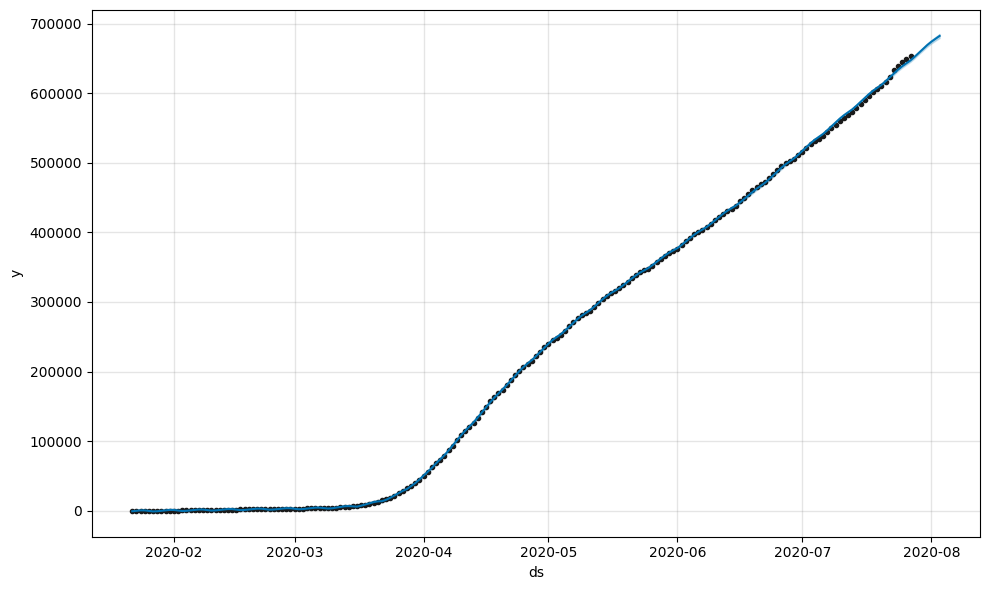

In [ ]:
deaths_forecast_plot = m.plot(forecast)

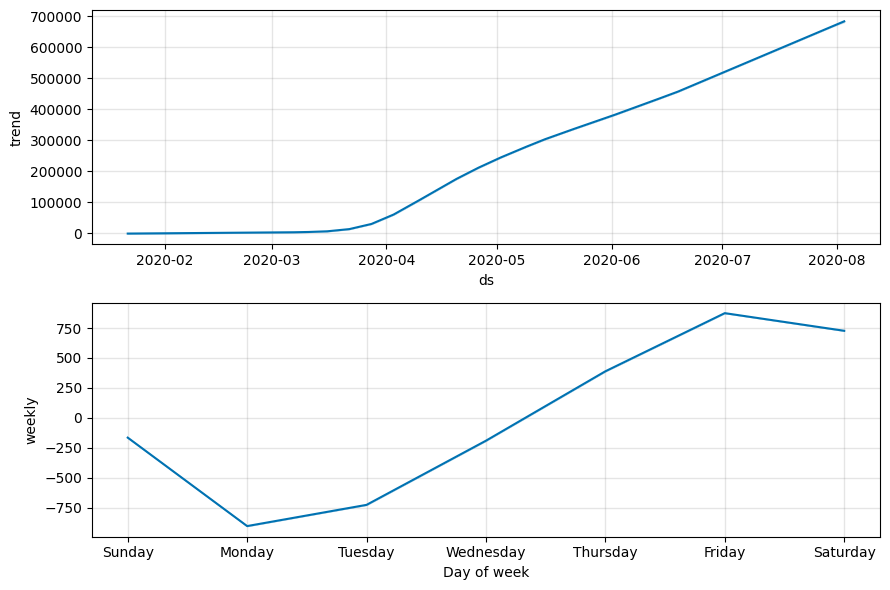

In [ ]:
deaths_forecast_plot = m.plot_components(forecast)

In [ ]:
recovered.columns = ['ds', 'y']
recovered['ds']= pd.to_datetime(recovered['ds'])

In [ ]:
m = Prophet()
m.fit(recovered)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfwidy9l/geafz5mc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfwidy9l/6qtku5r6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49522', 'data', 'file=/tmp/tmpdfwidy9l/geafz5mc.json', 'init=/tmp/tmpdfwidy9l/6qtku5r6.json', 'output', 'file=/tmp/tmpdfwidy9l/prophet_modelzrhu56cr/prophet_model-20230914141656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:16:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:16:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,9.600400e+06,9.514925e+06,9.682364e+06
191,2020-07-31,9.742022e+06,9.660963e+06,9.823795e+06
192,2020-08-01,9.882416e+06,9.801027e+06,9.965916e+06
193,2020-08-02,1.000855e+07,9.923477e+06,1.009567e+07
194,2020-08-03,1.014520e+07,1.005488e+07,1.022967e+07


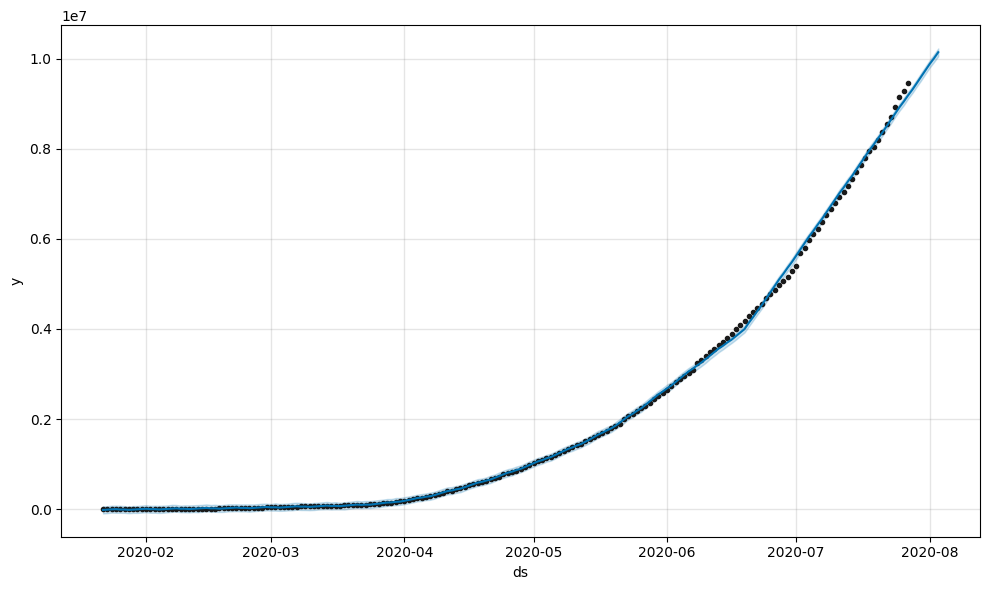

In [ ]:
recovered_forecast_plot = m.plot(forecast)

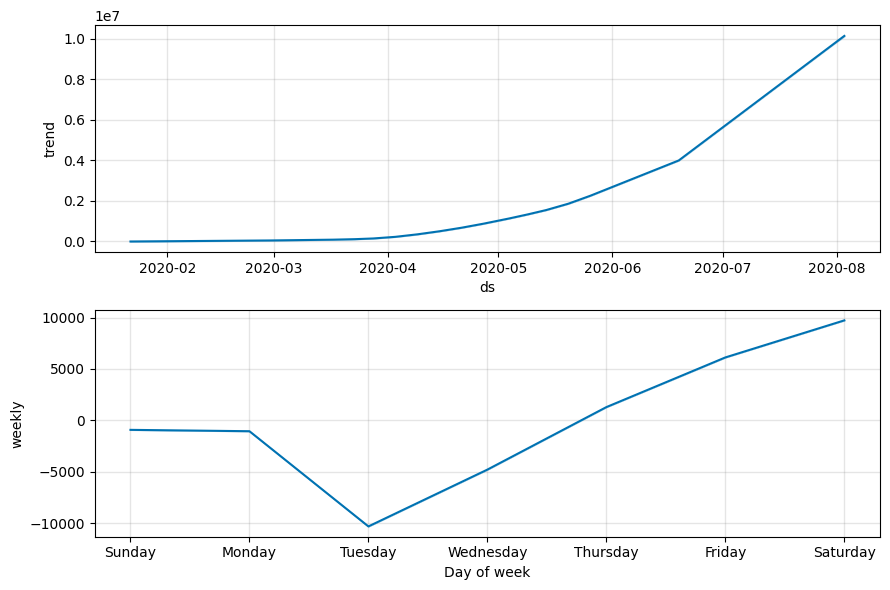

In [ ]:
recovered_forecast_plot = m.plot_components(forecast)

In [ ]:
india_confirmed.columns = ['ds', 'y']
india_confirmed['ds']= pd.to_datetime(india_confirmed['ds'])

In [ ]:
m = Prophet()
m.fit(india_confirmed)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfwidy9l/3qepllwp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfwidy9l/7o1j0wap.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92066', 'data', 'file=/tmp/tmpdfwidy9l/3qepllwp.json', 'init=/tmp/tmpdfwidy9l/7o1j0wap.json', 'output', 'file=/tmp/tmpdfwidy9l/prophet_modelv9q904ik/prophet_model-20230914141724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:17:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:17:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,1.403750e+06,1.367791e+06,1.440547e+06
191,2020-07-31,1.430959e+06,1.398389e+06,1.466053e+06
192,2020-08-01,1.457909e+06,1.420071e+06,1.495639e+06
193,2020-08-02,1.484998e+06,1.450189e+06,1.519839e+06
194,2020-08-03,1.511458e+06,1.473861e+06,1.545129e+06


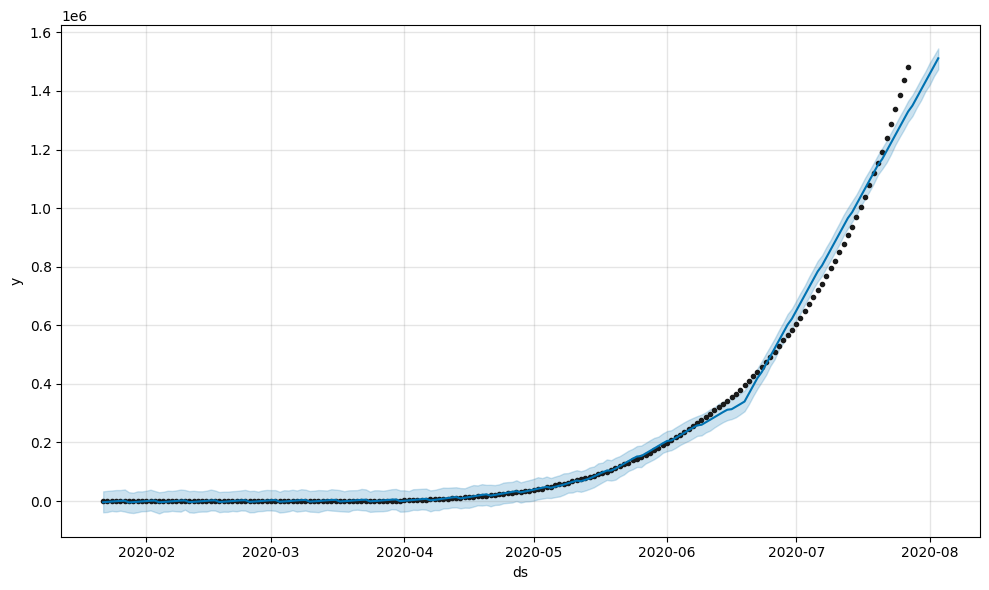

In [ ]:
india_confirmed_plot = m.plot(forecast)

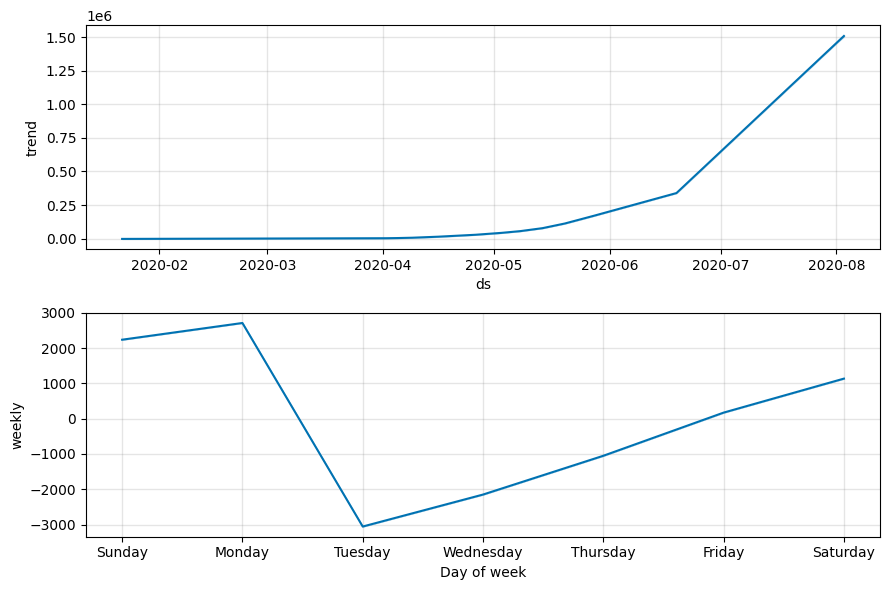

In [ ]:
india_confirmed_plot = m.plot_components(forecast)

In [ ]:
india_deaths.columns = ['ds', 'y']
india_deaths['ds']= pd.to_datetime(india_deaths['ds'])

In [ ]:
m = Prophet()
m.fit(india_deaths)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfwidy9l/ocbmvcem.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfwidy9l/aiskga95.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65529', 'data', 'file=/tmp/tmpdfwidy9l/ocbmvcem.json', 'init=/tmp/tmpdfwidy9l/aiskga95.json', 'output', 'file=/tmp/tmpdfwidy9l/prophet_modelkc8c40xk/prophet_model-20230914141813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:18:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:18:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,33353.862234,32910.123786,33802.353902
191,2020-07-31,33879.357267,33427.607868,34323.221895
192,2020-08-01,34399.040232,33935.203487,34867.480289
193,2020-08-02,34915.424809,34425.095908,35374.609774
194,2020-08-03,35425.244259,34931.320810,35904.800287


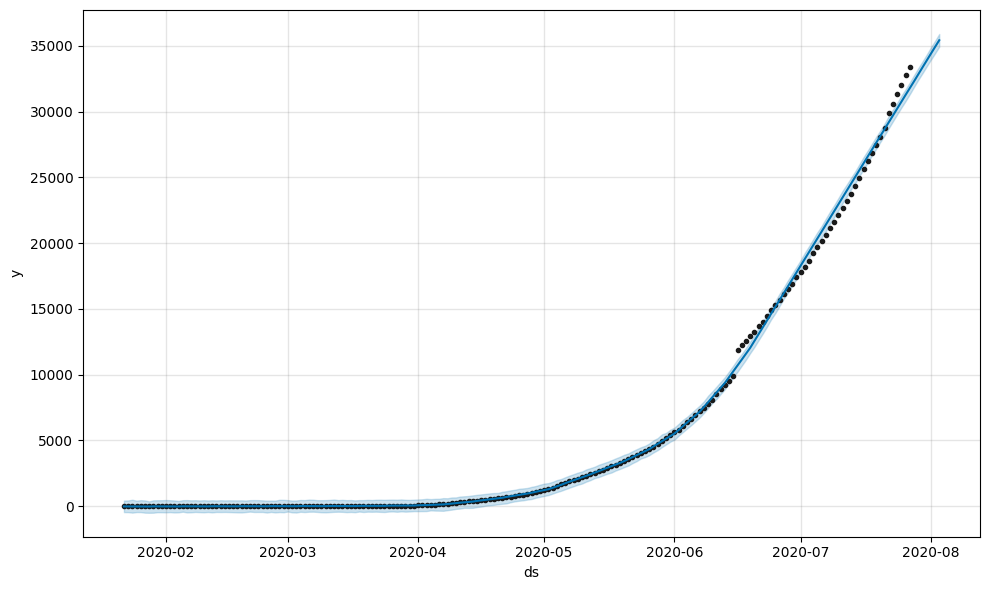

In [ ]:
india_deaths_plot = m.plot(forecast)

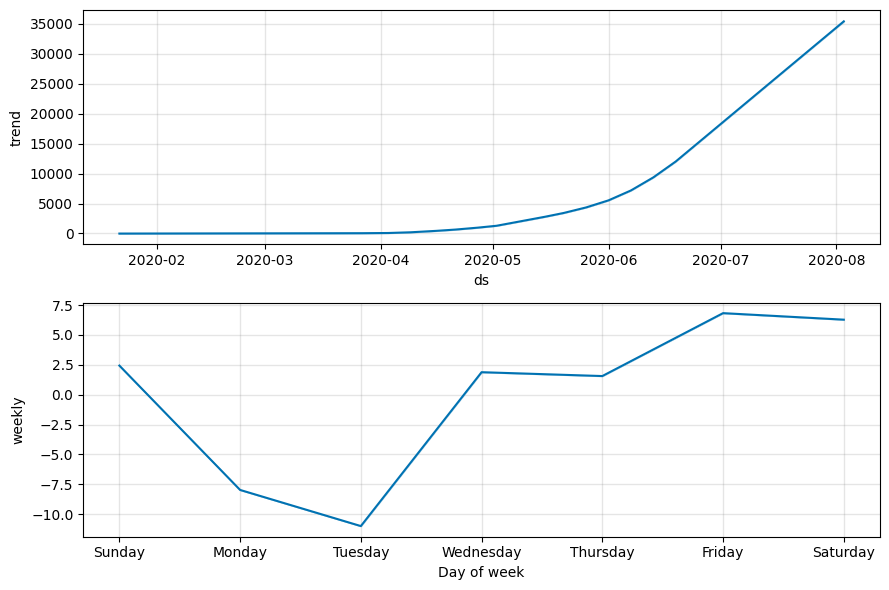

In [ ]:
india_deaths_plot = m.plot_components(forecast)

In [ ]:
india_recovered.columns = ['ds', 'y']
india_recovered['ds']= pd.to_datetime(india_recovered['ds'])

In [ ]:
m = Prophet()
m.fit(india_recovered)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfwidy9l/xkpf0u9l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfwidy9l/215lg4vm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3266', 'data', 'file=/tmp/tmpdfwidy9l/xkpf0u9l.json', 'init=/tmp/tmpdfwidy9l/215lg4vm.json', 'output', 'file=/tmp/tmpdfwidy9l/prophet_model8qqj1o30/prophet_model-20230914141839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:18:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:18:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,904877.404088,884180.041677,9.276191e+05
191,2020-07-31,923362.310578,902568.639195,9.446154e+05
192,2020-08-01,941822.749390,920151.882872,9.640347e+05
193,2020-08-02,959837.704342,937016.297864,9.824960e+05
194,2020-08-03,978108.215633,955640.049845,1.000464e+06


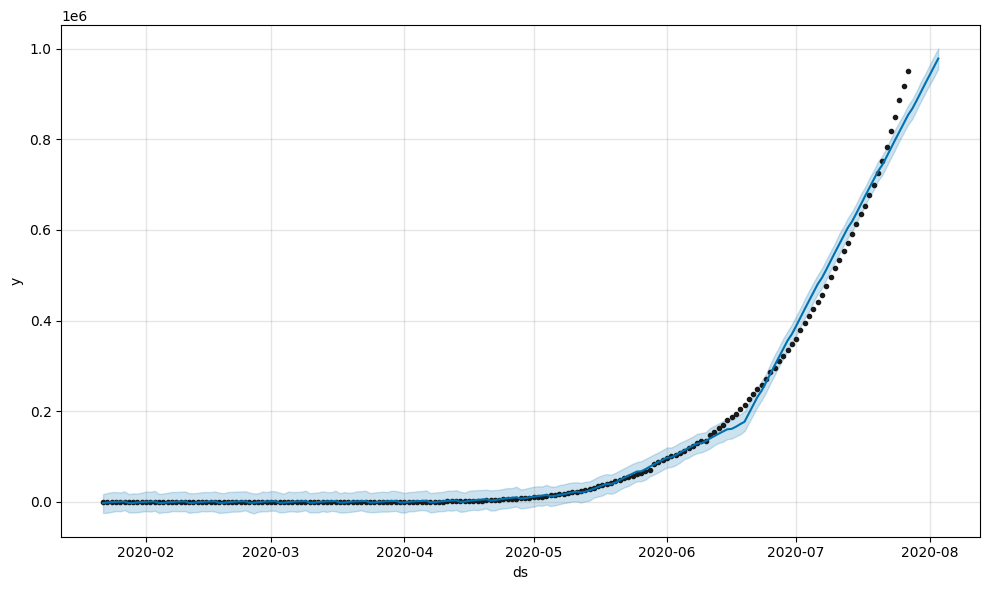

In [ ]:
india_recovered_plot = m.plot(forecast)

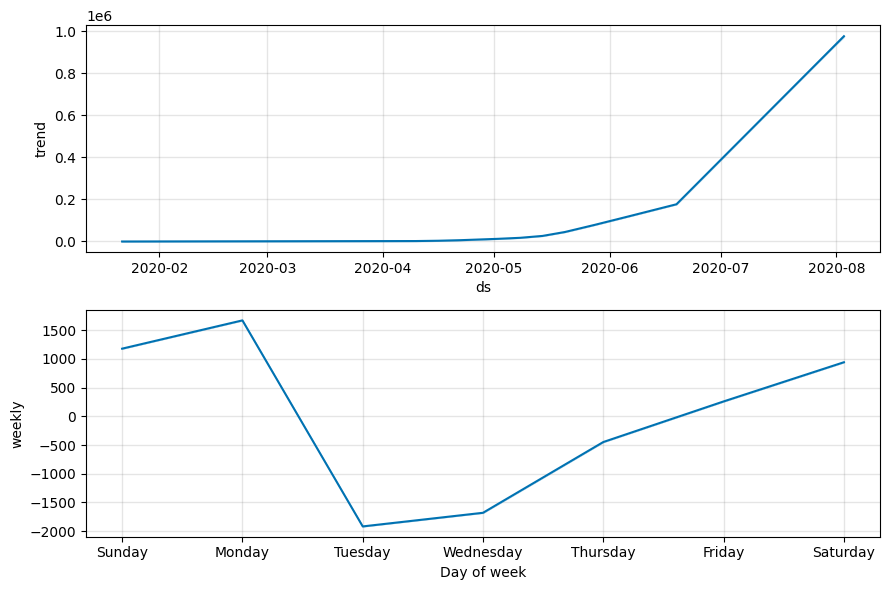

In [ ]:
india_recovered_plot = m.plot_components(forecast)

THANK YOU